> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### TMDB Movies

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.I'll ask questions related to genres and popularity.



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

ERROR: Could not find a version that satisfies the requirement pandas==0.25.0 (from versions: none)
ERROR: No matching distribution found for pandas==0.25.0


<a id='wrangling'></a>
## Data Wrangling

> I will load data and cleaning data


### General Properties
> Data Chosen for Analysis is : TMDB Movies
> **Questions to answer**
1 - which genres are most populer?
2 - what kinds of properties are associated with movies that have high revenues ? 

In [8]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [11]:
df.shape

(10866, 21)

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> Delete unnecessary columns
**Cleaning Process**
-remove cast, homepage, tagline, keywordm overview and imdb
-'genres' and 'productions_companies' were not in the first table
 

Second, I removed any unnecessary columns that provide little to no quantifiable value so that the table only contains information pertinent to my analysis. (cast, homepage, tagline, keywords, overview, imdb_id)



In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df= df.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id'], axis=1)

In [14]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9807 non-null   int64  
 1   popularity            9807 non-null   float64
 2   budget                9807 non-null   int64  
 3   revenue               9807 non-null   int64  
 4   original_title        9807 non-null   object 
 5   director              9807 non-null   object 
 6   runtime               9807 non-null   int64  
 7   genres                9807 non-null   object 
 8   production_companies  9807 non-null   object 
 9   release_date          9807 non-null   object 
 10  vote_count            9807 non-null   int64  
 11  vote_average          9807 non-null   float64
 12  release_year          9807 non-null   int64  
 13  budget_adj            9807 non-null   float64
 14  revenue_adj           9807 non-null   float64
dtypes: float64(4), int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

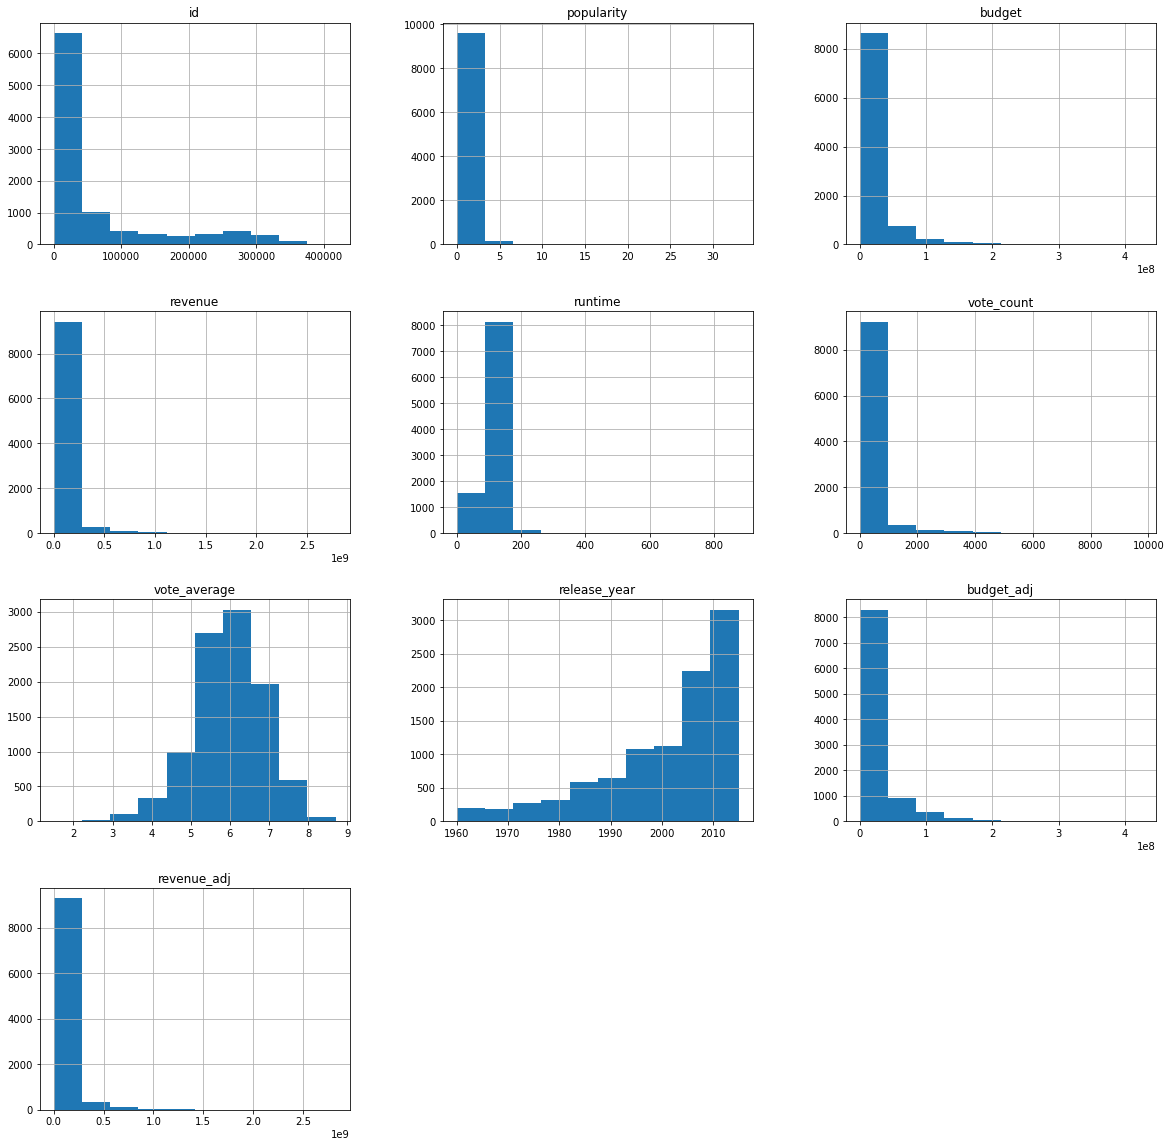

In [16]:
df.hist(figsize = (20,20))

In [17]:
#dropping nulls values 
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9807 non-null   int64  
 1   popularity            9807 non-null   float64
 2   budget                9807 non-null   int64  
 3   revenue               9807 non-null   int64  
 4   original_title        9807 non-null   object 
 5   director              9807 non-null   object 
 6   runtime               9807 non-null   int64  
 7   genres                9807 non-null   object 
 8   production_companies  9807 non-null   object 
 9   release_date          9807 non-null   object 
 10  vote_count            9807 non-null   int64  
 11  vote_average          9807 non-null   float64
 12  release_year          9807 non-null   int64  
 13  budget_adj            9807 non-null   float64
 14  revenue_adj           9807 non-null   float64
dtypes: float64(4), int64

In [18]:
#convert release_date to date (data type)
df['release_date'] = pd.to_datetime(df['release_date'])


In [19]:
# replace 0 values in budget and revenue .
df['budget'] = df['budget'].replace(0,df['budget'].mean())
df['revenue'] = df['revenue'].replace(0,df['revenue'].mean())

In [ ]:
# deleted some data from the rows with multiple values.

df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df['production_companies'] = df['production_companies'].apply(lambda x: x.split('|')[0])

In [20]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Now the Art of Analyze
> After Cleaning Dataset now i will analyze genres of movies and it's relations with other variables 



### Which genres are most popular ?

In [21]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
genres_pop =  df.groupby(['genres'])['popularity'].mean()
print(genres_pop)

genres
Action                                      0.630961
Action|Adventure                            0.718727
Action|Adventure|Animation                  0.454663
Action|Adventure|Animation|Comedy|Drama     0.370019
Action|Adventure|Animation|Comedy|Family    0.063246
                                              ...   
Western|Drama|Crime|Romance                 0.393664
Western|History                             0.128234
Western|History|War                         0.948560
Western|Horror|Thriller                     0.354484
Western|Thriller                            0.387592
Name: popularity, Length: 1921, dtype: float64


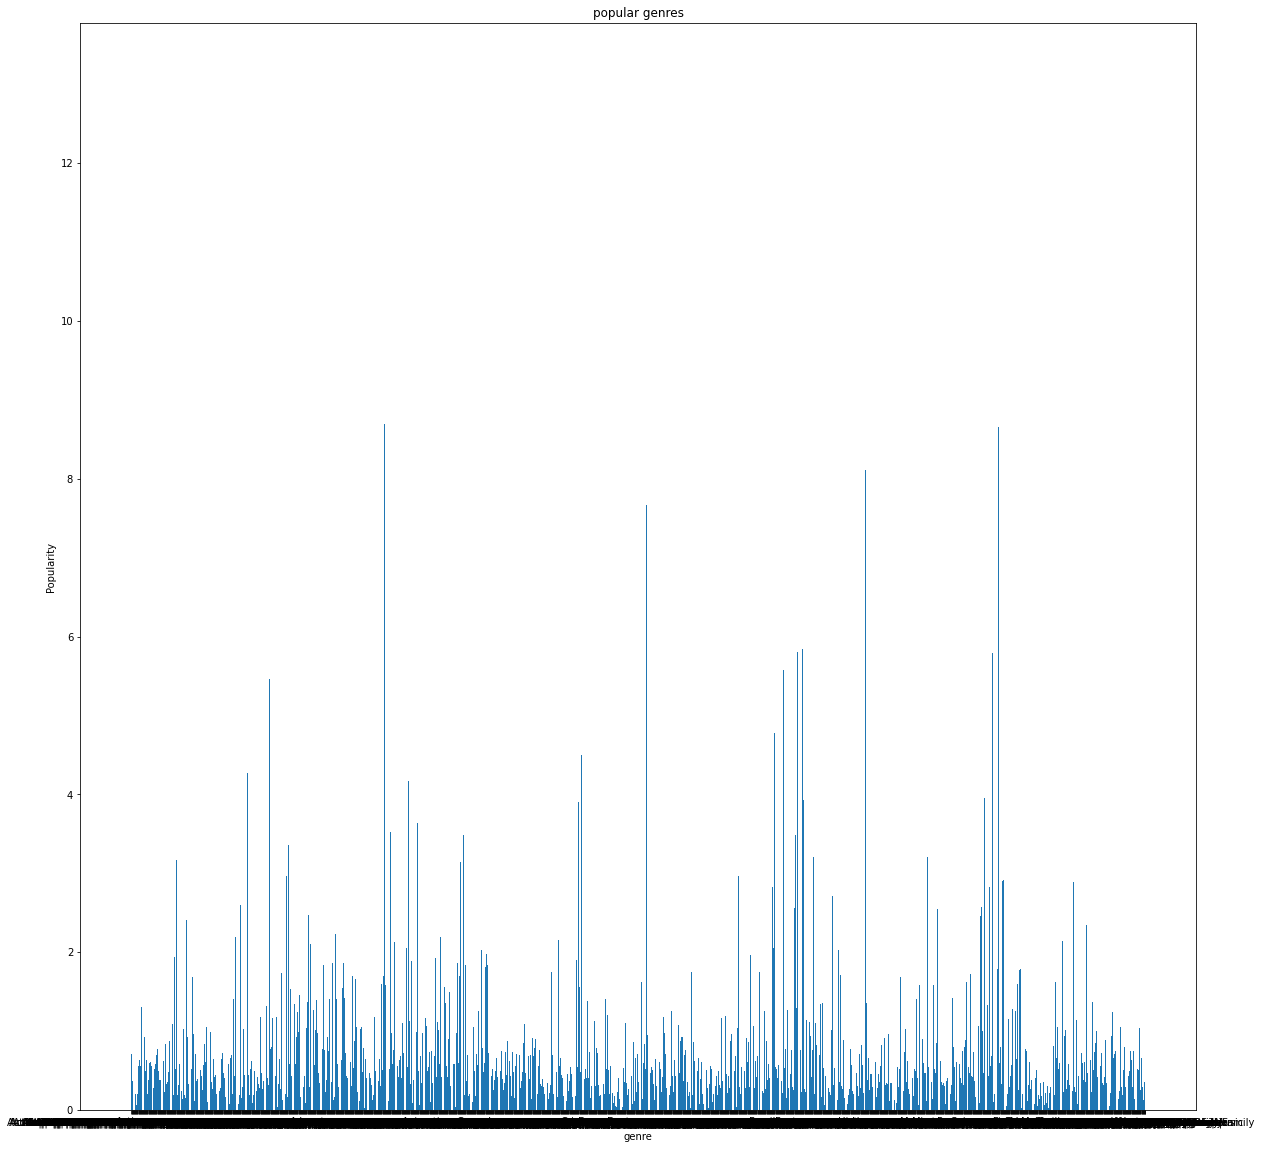

In [39]:
plt.subplots(figsize=(20, 20))
plt.bar(genres_pop.index, genres_pop)
plt.title('popular genres')
plt.xlabel('genre')
plt.ylabel('Popularity');


### What kinds of properties are associated with movies that have high revenues?


In [33]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
biggest_revenue = df.sort_values(by=['revenue'], ascending = False).head(100)
biggest_revenue.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,7.637767,220000000.0,1.519558e+09,The Avengers,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


<AxesSubplot:>

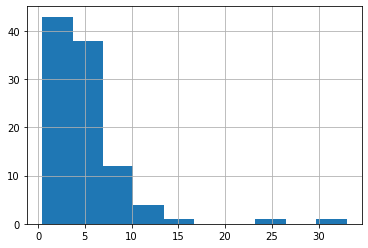

In [35]:
biggest_revenue.popularity.hist()

<AxesSubplot:>

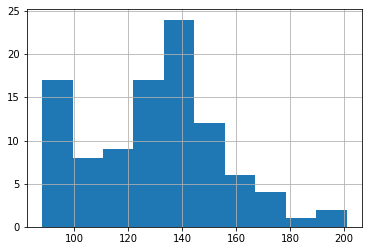

In [36]:
#I got that the most revenuable movies has popularity around 2.5 and it's run time is between 100-130 min for most of them.
biggest_revenue.runtime.hist()

### Are Short movies more popular ?
let's see

In [37]:
# The Shortest movies is more popular 
short_movies = df.sort_values(by=['runtime'], ascending = False).head(100)
runtime = short_movies['runtime']
popularity = short_movies['popularity']

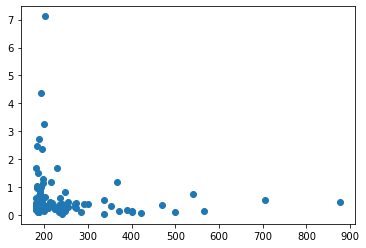

In [38]:
plt.scatter(runtime, popularity)
plt.show()

We can See that the popular movies is the shortest movies.

<a id='conclusions'></a>



## Conclusions

>In the first question I found that adventure movies is the most popular genre however I assumed it'll be Action movies, and after adventure came science fiction movies.

>In my second questions I wanted to know some characteristics of most revenuable movies so I found that the most revenuable movies is not that popular as it should, also I found that it's runtime approximately 100-130 min.
|

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])